Start!


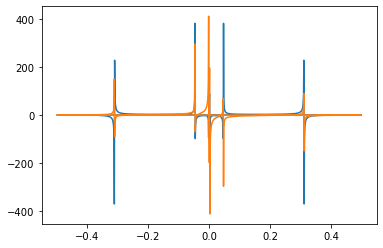

In [1]:
import numpy as np
print("Start!")
t = np.linspace(0, 10, 1024)
value = np.sin(200 * t) + np.cos(30 * t) + np.sin(t + 1)
out = np.fft.fft(value)
import matplotlib.pyplot as plt
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, out.real, freq, out.imag)

In [1]:
# draw a 40 x 30 image from serial data
import serial
import cv2
ser = serial.Serial('/dev/ttyACM1',timeout=1) # use your port name
#print(ser.name)

import numpy as np # for arrays
ser.write(b'\n')
WIDTH = 40
HEIGHT = 30

canvas = np.zeros((30, 40, 3), np.uint8)
t = 0
while t < 1000:
    ser.write(b'\n')
    ser.write(b'\n')
    data = []
    while True:
        a = ser.readline()
        txt = a.split()
        if len(txt) == 4:
            # print(int(txt[0]))
            if len(data) == int(txt[0]):
                data.append(np.array([int(txt[3]), int(txt[2]), int(txt[1])], dtype=np.uint8))
            if len(data) == 1200:
                break
    data = np.array(data).reshape(30, 40, 3)
    pic = cv2.resize(data, (800, 600), interpolation=cv2.INTER_CUBIC)
    cv2.imshow("test", pic)
    cv2.waitKey(10000)


In [2]:
# draw a 40 x 30 image from serial data
import serial
import cv2
ser = serial.Serial('/dev/ttyACM1',timeout=1) # use your port name
#print(ser.name)

import numpy as np # for arrays
ser.write(b'\n')
WIDTH = 40
HEIGHT = 30

canvas = np.zeros((30, 40, 3), np.uint8)
t = 0
while t < 1000:
    ser.write(b'\n')
    ser.write(b'\n')
    data = []
    start = 0
    while True:
        a = ser.readline()
        txt = a.split()
        if len(txt) == 4:
            if start or int(txt[0]) == 240:
                data.append(np.array([int(txt[3]), int(txt[2]), int(txt[1])], dtype=np.uint8))
                start = 1
            if len(data) == 120:
                break
    data = np.array(data).reshape(3, 40, 3)
    pic = cv2.resize(data, (800, 60), interpolation=cv2.INTER_CUBIC)
    cv2.imshow("test", pic)
    cv2.waitKey(10000)